In [ ]:
###   Importação de bibliotecas   ###

In [1]:
import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [2]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [ ]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [5]:
###   Parâmetros a serem avalizados   ###

parametros = {'n_estimators' : np.arange(100,850,100), 'max_depth': np.arange(10,30,10), 'min_samples_split': np.arange(2,6,2),
             'min_samples_leaf':np.arange(2,6,2), 'learning_rate': [.001,.1,1]}

In [6]:
###   Chamando a classe para o processo   ###

est = GradientBoostingRegressor()

In [7]:
### Processo de validação cruzada (busca de parâmetros)   ###


resultados_analise_parametros = tsf.obter_parametros(est, parametros, X_treino,Y_treino)

In [8]:
###    Imprime a classe do modelo com os melhores parâmetros calculados   ###

resultados_analise_parametros.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
###   Treina o modelo com os melhores prâmetros   ###

treino1 = resultados_analise_parametros.best_estimator_
treino1.fit(X_treino,Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino1.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino1.predict(X_treino),Y_treino)))


 R^2: 
 0.9787192051760074 
 RMSE : 
 4.9903181883117975


In [11]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino1.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino1.predict(X_teste),Y_teste)))


 R^2: 
 0.9320087149430583 
 RMSE : 
 8.89725450215527


In [12]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros 2   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [15]:
###   Parâmetros a serem avalizados   ###

parametros2 = {'n_estimators' : [80,100,150,175], 'max_depth': [10,15], 'min_samples_split': [4,5],
             'min_samples_leaf':[4,5], 'learning_rate': [.01,.1,.5]}

est = GradientBoostingRegressor()

In [16]:
resultados_analise_parametros2 = tsf.obter_parametros(est, parametros2, X_treino,Y_treino)

In [17]:
resultados_analise_parametros2.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
###   Treina o modelo com os melhores prâmetros   ###

treino2 = resultados_analise_parametros2.best_estimator_
treino2.fit(X_treino,Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino2.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino2.predict(X_treino),Y_treino)))


 R^2: 
 0.9791434705086706 
 RMSE : 
 4.940322921533428


In [20]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino2.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino2.predict(X_teste),Y_teste)))


 R^2: 
 0.9308479166262699 
 RMSE : 
 8.972883377790936


In [21]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros 3   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [3]:
parametros3 = {'n_estimators' : [20,40,60,100,140], 'max_depth': [10], 'min_samples_split': [5],
             'min_samples_leaf':[5,6], 'learning_rate': [.1]}
est = GradientBoostingRegressor()

In [4]:
resultados_analise_parametros3 = tsf.obter_parametros(est, parametros3, X_treino,Y_treino)

In [5]:
resultados_analise_parametros3.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=140,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
###   Treina o modelo com os melhores prâmetros   ###

treino3 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
treino3.fit(X_treino,Y_treino)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino3.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino3.predict(X_treino),Y_treino)))


 R^2: 
 0.978529264003916 
 RMSE : 
 5.0125391918021815


In [13]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino3.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino3.predict(X_teste),Y_teste)))


 R^2: 
 0.9308455364062471 
 RMSE : 
 8.973037800129779


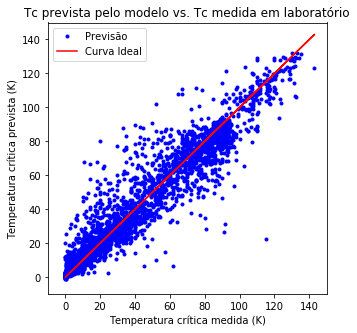

In [15]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

import matplotlib.pyplot as plt

print_x = Y_teste
print_y = treino3.predict(X_teste)

f, ax = plt.subplots(figsize=(5, 5))
plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')

plt.xlabel('Temperatura crítica medida (K)')
plt.ylabel('Temperatura crítica prevista (K)')
plt.legend('Previsão')
plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, 'r-', label = 'Curva Ideal')
plt.legend()

plt.axis([-10,150,-10,150])

plt.show()